<a href="https://colab.research.google.com/github/kauesaula/Case-Analise-de-Dados/blob/main/Projeto_Case_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas a serem utilizadas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importanto o conteúdo diretamente do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Definindo o dataframe da tabela de dados
df_dados = pd.read_excel('/content/drive/MyDrive/Base de Dados - Case.xlsx')
df_dados.head(10)

,Nome Completo do Colaborador,Data de Entrada,Estado Atual,Empresa,Salário,CLUSTER,DIRETORIA
0,Colaborador 01,2023-06-21,ATIVO,VIAPAULISTA,1100.50,Operacional,Dir Operações
1,Colaborador 02,2023-06-21,ATIVO,PLANALTO SUL,2500.75,Liderança Estratégica,Pessoas & Organização
2,Colaborador 03,2023-06-27,ATIVO,PLANALTO SUL,4200.80,Operacional,Dir Operações
3,Colaborador 04,2023-06-27,ATIVO,PLANALTO SUL,1800.65,Operacional,Pessoas & Organização
4,Colaborador 05,2023-06-23,ATIVO,FLUMINENSE,5600.30,Operacional,Dir Operações
5,Colaborador 06,2023-06-29,ATIVO,FLUMINENSE,3900.25,Operacional,Dir Operações
6,Colaborador 07,2023-06-28,ATIVO,FERNAO DIAS,2000.40,Operacional,Dir Operações
7,Colaborador 08,2023-06-30,ATIVO,PLANALTO SUL,6800.90,Operacional,Pessoas & Organização
8,Colaborador 09,2023-06-29,ATIVO,FLUMINENSE,3500.70,Operacional,Dir Operações
9,Colaborador 10,2023-06-16,ATIVO,FERNAO DIAS,4900.55,Profissional,Pessoas & Organização


In [4]:
# Renomeando as colunas de modo a facilitar a manipulação do projeto
df_dados = df_dados.rename(columns={'Nome Completo do Colaborador':'nome_compt_colab', 'Data de Entrada':'data_entrada', 'Estado Atual':'situacao', 'Empresa':'empresa','Salário':'salario','CLUSTER':'cluster', 'DIRETORIA':'diretoria'}).copy()
df_dados.head(5)

,nome_compt_colab,data_entrada,situacao,empresa,salario,cluster,diretoria
0,Colaborador 01,2023-06-21,ATIVO,VIAPAULISTA,1100.50,Operacional,Dir Operações
1,Colaborador 02,2023-06-21,ATIVO,PLANALTO SUL,2500.75,Liderança Estratégica,Pessoas & Organização
2,Colaborador 03,2023-06-27,ATIVO,PLANALTO SUL,4200.80,Operacional,Dir Operações
3,Colaborador 04,2023-06-27,ATIVO,PLANALTO SUL,1800.65,Operacional,Pessoas & Organização
4,Colaborador 05,2023-06-23,ATIVO,FLUMINENSE,5600.30,Operacional,Dir Operações


In [5]:
# Consultando a composição da tabela
df_dados.shape

(300, 7)

In [6]:
# Consultando os tipos de dados das colunas
data_types = df_dados.dtypes
print(data_types)

nome_compt_colab            object
data_entrada        datetime64[ns]
situacao                    object
empresa                     object
salario                    float64
cluster                     object
diretoria                   object
dtype: object


In [7]:
# Verificando se há algum valor ausente na tabela
df_dados.isnull().sum()

nome_compt_colab    0
data_entrada        0
situacao            0
empresa             0
salario             0
cluster             0
diretoria           0
dtype: int64

In [8]:
# Convertendo o tipo de dado da variável "data_entrada" para datetime
df_dados['data_entrada'] = pd.to_datetime(df_dados['data_entrada'])
df_dados

,nome_compt_colab,data_entrada,situacao,empresa,salario,cluster,diretoria
0,Colaborador 01,2023-06-21,ATIVO,VIAPAULISTA,1100.50,Operacional,Dir Operações
1,Colaborador 02,2023-06-21,ATIVO,PLANALTO SUL,2500.75,Liderança Estratégica,Pessoas & Organização
2,Colaborador 03,2023-06-27,ATIVO,PLANALTO SUL,4200.80,Operacional,Dir Operações
3,Colaborador 04,2023-06-27,ATIVO,PLANALTO SUL,1800.65,Operacional,Pessoas & Organização
4,Colaborador 05,2023-06-23,ATIVO,FLUMINENSE,5600.30,Operacional,Dir Operações
...,...,...,...,...,...,...,...
295,Colaborador 296,2022-10-01,FÉRIAS,VIAPAULISTA,2000.40,Operacional,Dir Operações
296,Colaborador 297,2022-10-02,FÉRIAS,INTERVIAS,6800.90,Operacional,Dir Operações
297,Colaborador 298,2022-10-03,ATIVO,FERNAO DIAS,3500.70,Operacional,Dir Operações
298,Colaborador 299,2022-10-04,ATIVO,LITORAL SUL,4900.55,Operacional,Dir Operações


In [9]:
# Adicionando a variável "ano_entrada" para melhor vizualização referente aos anos de ingresso nas empresas
df_dados['ano_entrada'] = df_dados['data_entrada'].dt.year
df_dados

,nome_compt_colab,data_entrada,situacao,empresa,salario,cluster,diretoria,ano_entrada
0,Colaborador 01,2023-06-21,ATIVO,VIAPAULISTA,1100.50,Operacional,Dir Operações,2023
1,Colaborador 02,2023-06-21,ATIVO,PLANALTO SUL,2500.75,Liderança Estratégica,Pessoas & Organização,2023
2,Colaborador 03,2023-06-27,ATIVO,PLANALTO SUL,4200.80,Operacional,Dir Operações,2023
3,Colaborador 04,2023-06-27,ATIVO,PLANALTO SUL,1800.65,Operacional,Pessoas & Organização,2023
4,Colaborador 05,2023-06-23,ATIVO,FLUMINENSE,5600.30,Operacional,Dir Operações,2023
...,...,...,...,...,...,...,...,...
295,Colaborador 296,2022-10-01,FÉRIAS,VIAPAULISTA,2000.40,Operacional,Dir Operações,2022
296,Colaborador 297,2022-10-02,FÉRIAS,INTERVIAS,6800.90,Operacional,Dir Operações,2022
297,Colaborador 298,2022-10-03,ATIVO,FERNAO DIAS,3500.70,Operacional,Dir Operações,2022
298,Colaborador 299,2022-10-04,ATIVO,LITORAL SUL,4900.55,Operacional,Dir Operações,2022


In [10]:
# Adicionando a variável "mes_entrada" para melhor vizualização referente aos anos de ingresso nas empresas
df_dados['mes_entrada'] = df_dados['data_entrada'].dt.month
df_dados

,nome_compt_colab,data_entrada,situacao,empresa,salario,cluster,diretoria,ano_entrada,mes_entrada
0,Colaborador 01,2023-06-21,ATIVO,VIAPAULISTA,1100.50,Operacional,Dir Operações,2023,6
1,Colaborador 02,2023-06-21,ATIVO,PLANALTO SUL,2500.75,Liderança Estratégica,Pessoas & Organização,2023,6
2,Colaborador 03,2023-06-27,ATIVO,PLANALTO SUL,4200.80,Operacional,Dir Operações,2023,6
3,Colaborador 04,2023-06-27,ATIVO,PLANALTO SUL,1800.65,Operacional,Pessoas & Organização,2023,6
4,Colaborador 05,2023-06-23,ATIVO,FLUMINENSE,5600.30,Operacional,Dir Operações,2023,6
...,...,...,...,...,...,...,...,...,...
295,Colaborador 296,2022-10-01,FÉRIAS,VIAPAULISTA,2000.40,Operacional,Dir Operações,2022,10
296,Colaborador 297,2022-10-02,FÉRIAS,INTERVIAS,6800.90,Operacional,Dir Operações,2022,10
297,Colaborador 298,2022-10-03,ATIVO,FERNAO DIAS,3500.70,Operacional,Dir Operações,2022,10
298,Colaborador 299,2022-10-04,ATIVO,LITORAL SUL,4900.55,Operacional,Dir Operações,2022,10


In [11]:
# Obtendo uma descrição detalhada da tabela de dados com as medidas de tendência central
df_dados.describe()

,data_entrada,salario,ano_entrada,mes_entrada
count,300,300.000000,300.000000,300.000000
mean,2022-02-14 08:43:12,7936.853667,2021.600000,6.846667
min,2019-07-05 00:00:00,1100.500000,2019.000000,2.000000
25%,2019-09-27 18:00:00,4200.800000,2019.000000,7.000000
50%,2022-07-17 12:00:00,7600.100000,2022.000000,7.000000
75%,2023-06-19 12:00:00,11200.100000,2023.000000,8.000000
max,2024-03-24 00:00:00,18400.800000,2024.000000,10.000000
std,NaN,4412.208164,1.699892,1.972170


In [12]:
# Checando a distribuição de frequências da variável "cluster"
df_dados['cluster'].value_counts()

cluster
Operacional              194
Profissional              79
Estágio                   15
Liderança Tática           6
Gerência                   3
Liderança Estratégica      2
Aprendiz/Estag             1
Name: count, dtype: int64

<Axes: xlabel='cluster'>

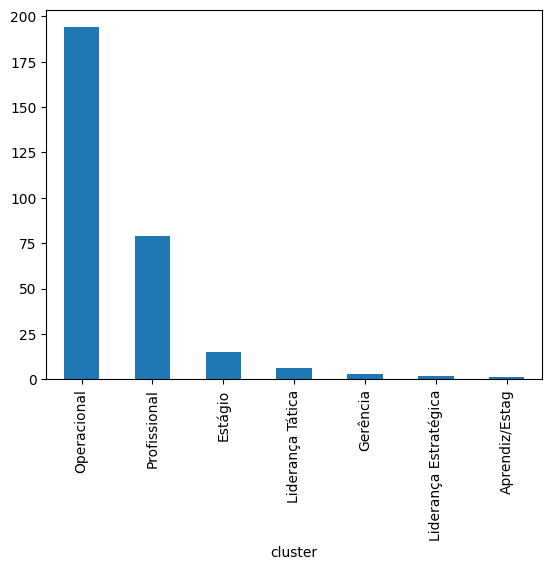

In [13]:
# Vizualização da distribuição de frequência no formato gráfico de colunas
df_dados['cluster'].value_counts().plot(kind='bar')

In [14]:
# Checando a distribuição de frequências da variável "diretoria"
df_dados['diretoria'].value_counts()

diretoria
Dir Operações                      179
Pessoas & Organização               39
Dir Engenharia e Implantação        39
Dir Financeira                      35
Dir Rel Inst & Sustentabilidade      8
Name: count, dtype: int64

<Axes: xlabel='diretoria'>

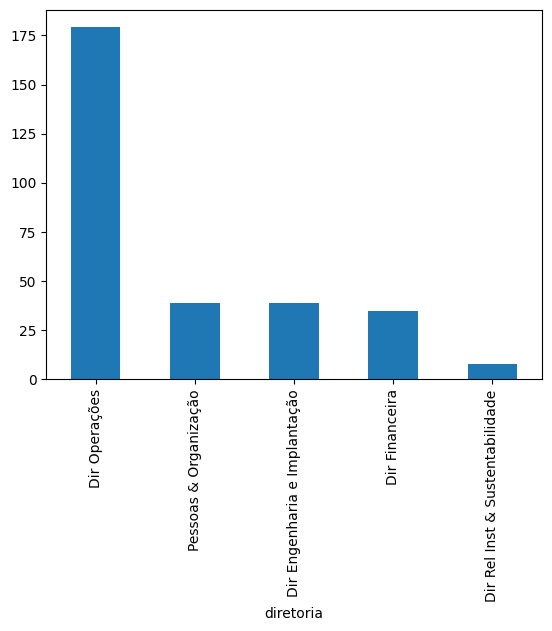

In [15]:
# Vizualização da distribuição de frequência no formato gráfico de colunas
df_dados['diretoria'].value_counts().plot(kind='bar')

In [16]:
# Checando a distribuição de frequências da variável "empresa"
df_dados['empresa'].value_counts()

empresa
FERNAO DIAS          88
LITORAL SUL          65
VIAPAULISTA          42
FLUMINENSE           33
ARTERIS              21
REGIS BITTENCOURT    20
PLANALTO SUL         16
INTERVIAS            15
Name: count, dtype: int64

<Axes: xlabel='empresa'>

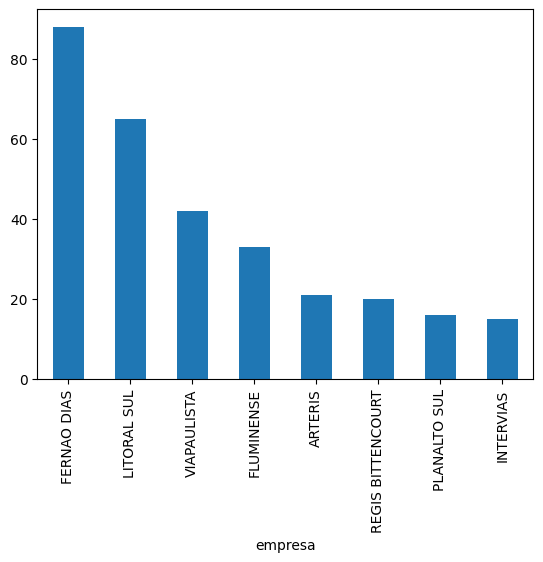

In [17]:
# Vizualização da distribuição de frequência no formato gráfico de colunas
df_dados['empresa'].value_counts().plot(kind='bar')

In [18]:
# Checando a distribuição de frequências da variável "ano_entrada"
df_dados['ano_entrada'].value_counts()

ano_entrada
2022    131
2019     76
2024     45
2023     33
2021     15
Name: count, dtype: int64

<Axes: xlabel='ano_entrada'>

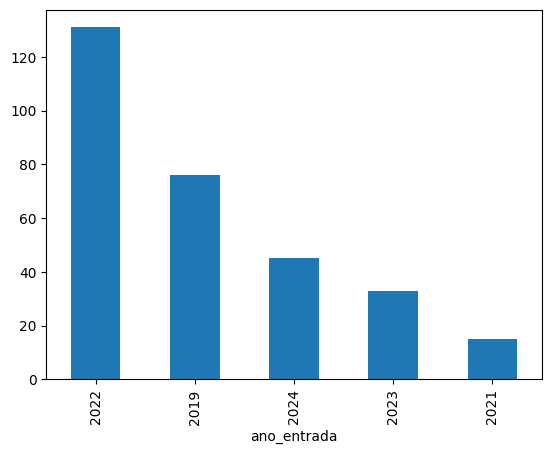

In [19]:
# Vizualização da distribuição de frequência no formato gráfico de colunas
df_dados['ano_entrada'].value_counts().plot(kind='bar')

<Axes: >

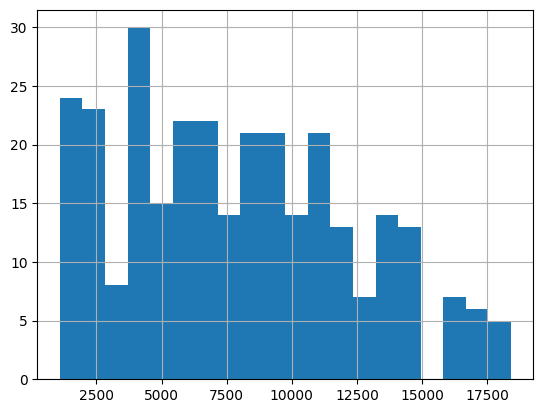

In [20]:
# Apresentando a distribuição dos Salários
df_dados['salario'].hist(bins=20)

In [21]:
# Indicadores: maior salário, menor salário e relação entre cluster e empresa

In [22]:
# Calculando a media do salário por cluster
  # Onde Média de Salário Por Cluster = Soma dos Salários da Cluster / Número de Registros da Cluster

media_salario_cluster = df_dados.groupby('cluster')['salario'].mean()
media_salario_cluster

cluster
Aprendiz/Estag           11200.700000
Estágio                   6833.886667
Gerência                 11667.183333
Liderança Estratégica     5850.450000
Liderança Tática          8616.991667
Operacional               8064.450258
Profissional              7651.131013
Name: salario, dtype: float64

In [23]:
# Indicará qual cluster recebe o maior salário baseado nas médias de salário por cluster
cluster_maior_salario = media_salario_cluster.idxmax()
print(f'A cluster que possui o maior salário médio é: {cluster_maior_salario}')

A cluster que possui o maior salário médio é: Gerência


In [24]:
# Indicará qual cluster recebe o menor salário baseado nas médias de salário por cluster
cluster_menor_salario = media_salario_cluster.idxmin()
print(f'A cluster que possui o menor salário médio é: {cluster_menor_salario}')

A cluster que possui o menor salário médio é: Liderança Estratégica


In [25]:
# Indicará se o salário referente à mesma cluster varia dependendo da empresa em que o colaborador está instalado

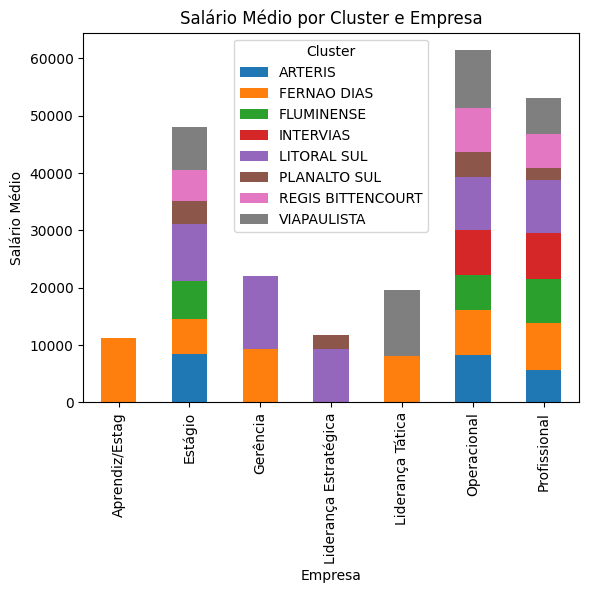

In [26]:
# Calculando a média do salário por cluster e empresa e vizualizando em formato gráfico de barras empilhado
  # Onde Média de Salário por Cluster e Empresa = Soma dos Salários da Cluster e Empresa / Número de Registros do Cargo e Empresa

media_salario_cluster_empresa = df_dados.groupby(['cluster', 'empresa'])['salario'].mean()

media_salario_cluster_empresa_desempilhado = media_salario_cluster_empresa.unstack()
media_salario_cluster_empresa_desempilhado.plot(kind="bar", stacked=True)
plt.xlabel('Empresa')
plt.ylabel('Salário Médio')
plt.title('Salário Médio por Cluster e Empresa')
plt.legend(title='Cluster')
plt.show()

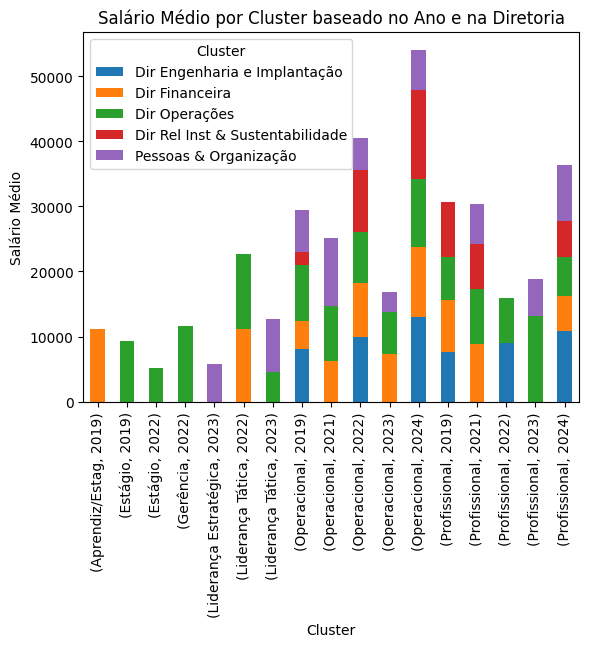

In [27]:
# Analisando a relação salarial da cluster com base na relação entre ano de entrada e diretoria
  # Onde Média de Salário por Cargo, Ano de Entrada e Diretoria = Soma dos Salários do Cargo, Ano de Entrada e Diretoria / Número de Registros do Cargo, Ano de Entrada e Diretoria

media_salario_cluster_ano_diretoria = df_dados.groupby(['cluster', 'ano_entrada', 'diretoria'])['salario'].mean()
media_salario_cluster_ano_diretoria

media_salario_cluster_ano_diretoria_desempilhado = media_salario_cluster_ano_diretoria.unstack()
media_salario_cluster_ano_diretoria_desempilhado.plot(kind="bar", stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Salário Médio')
plt.title('Salário Médio por Cluster baseado no Ano e na Diretoria')
plt.legend(title='Cluster')
plt.show()